<h1>A Demonstration Script for Creating Representative Colour Images</h1>
<p><b>George J. Bendo</b><br/>
<b>02 January 2022</b></p>

<p>This script takes three FITS images covering the same part of the sky, colourizes each one using a different colour (red, green, or blue), and then combines the three images together to produce a colour image that is exported as a png file.  This type of image is called a representative colour image because each colour represents a specific wavelength of light.  However,  the colours may not be the same as the observed colours, especially when the colours correspond to wavelengths of light outside the visible part of the electromagnetic spectrum (as is the case for the images used in this demonstration scripts, which are all infrared images).</p>

<p>The example used in this script is based on the following files:</p>
<ul>
<li><b>Red:</b> <a href="http://almanas.jb.man.ac.uk/gbendo/Web/Sci/Pict/ngc3031_herschel250micron.fits">http://almanas.jb.man.ac.uk/gbendo/Web/Sci/Pict/ngc3031_herschel250micron.fits</a></li>
<li><b>Green:</b> <a href="http://ned.ipac.caltech.edu/img/2012MNRAS.423..197B/NGC_3031:I:MIPS24:bgm2012.fits.gz">http://ned.ipac.caltech.edu/img/2012MNRAS.423..197B/NGC_3031:I:MIPS24:bgm2012.fits.gz</a></li>
<li><b>Blue:</b><a href="http://almanas.jb.man.ac.uk/gbendo/Web/Sci/Pict/ngc3031_spitzer3.6micron.fits">http://almanas.jb.man.ac.uk/gbendo/Web/Sci/Pict/ngc3031_spitzer3.6micron.fits</a></li>
</ul>
<p>These files should be downloaded to the directory containing the Juptier Notebook before attempting to execute the script.</p>

<p>This script could be adapted to work with other FITS files, although most of the lines would need to be modified.  Modifications would therefore only be suggested for people who are familiar with Python programming or who have studied this script carefully.</p>

<p>The following packages need to be installed to use this script: astropy, matplotlib, numpy, and PIL.  The matplotlib and numpy packages are standard python utilities.  The astropy package contains the tools needed to import FITS files.  FITS_tools is used to shift all of the images to the same coordinate system.  PIL is used to export images as png files.</p>


Perform a series of prepratory steps first.

In [1]:
# Import packages.
import numpy
import matplotlib.pyplot as pp
from astropy.io import fits
from FITS_tools import hcongrid
from PIL import Image

Read in and prepare the images.

In [2]:
# Read the image files.  Each fits image is assigned to a different colour 
# (imgr, imgg, and imgb).
file=fits.open('ngc3031_spitzer3.6micron.fits')
imgb=file[0].data
headb=file[0].header
file.close()

file=fits.open('NGC_3031_I_MIPS24_bgm2012.fits')
imgg=file[0].data
headg=file[0].header
file.close()

file=fits.open('ngc3031_herschel250micron.fits')
imgr=file[0].data
headr=file[0].header
file.close()

In [3]:
# Use congrid to match the coordinate systems of all three images to 
# the coordinate system of the blue image (which has the smallest 
# pixels in this case).
imggshift=hcongrid.hastrom(imgg,headg,headb,preserve_bad_pixels=True)
imgrshift=hcongrid.hastrom(imgr,headr,headb,preserve_bad_pixels=True)

In [4]:
# Crop the images.
ix1=747
ix2=2187
iy1=837
iy2=2997
imgbcrop=imgb[iy1:iy2,ix1:ix2]
imggcrop=imggshift[iy1:iy2,ix1:ix2]
imgrcrop=imgrshift[iy1:iy2,ix1:ix2]

Rescale the images.

In [5]:
# Convert the image to log values, which will reveal more detail when the 
# images are converted to png. 

# These specific image are either background-subtracted or otherwise have 
# pixel values equal to or less than 0.  To make the colour scaling look 
# more natural, it is appropriate to add an offset to the data, which is 
# based on 3 or 5 times the background noise for these examples (or, in
# statistical terms, 3 or 5 times the standard deviation of the background
# pixel values.)
#
# [NOTE: Ignore the RuntimeWarning.]
imgblog=numpy.log10(imgbcrop+0.90)
imgglog=numpy.log10(imggcrop+0.13)
imgrlog=numpy.log10(imgrcrop+3.0)

C:\Users\georg\AppData\Local\Temp/ipykernel_15108/846428621.py:13: RuntimeWarning: invalid value encountered in log10
  imgglog=numpy.log10(imggcrop+0.13)
C:\Users\georg\AppData\Local\Temp/ipykernel_15108/846428621.py:14: RuntimeWarning: invalid value encountered in log10
  imgrlog=numpy.log10(imgrcrop+3.0)


In [6]:
# Rescale the images so that the pixel values run from 0 to 255.  The numbers
# in this step could be adjusted to either brighten or dim the red, green, or
# blue parts of the image.
imgbscl=(imgblog+0.0)*2.0*255
imggscl=(imgglog+0.5)*1.0*255
imgrscl=(imgrlog-0.55)*1.1*255

In [7]:
# Set out-of-range values in the rescaled images to fall between 0 
# and 255.
imgbscl[numpy.isnan(imgbscl)]=0
imggscl[numpy.isnan(imggscl)]=0
imgrscl[numpy.isnan(imgrscl)]=0
imgbscl[imgbscl<0]=0
imggscl[imggscl<0]=0
imgrscl[imgrscl<0]=0
imgbscl[imgbscl>255]=255
imggscl[imggscl>255]=255
imgrscl[imgrscl>255]=255

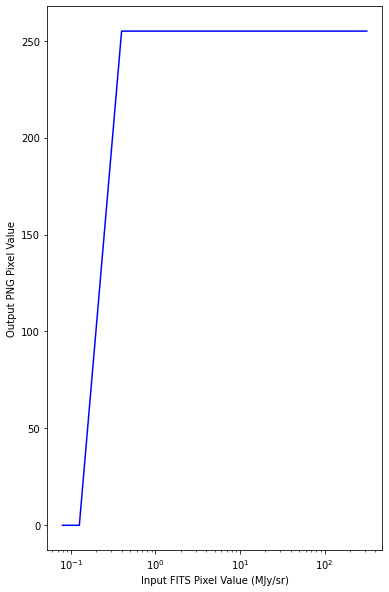

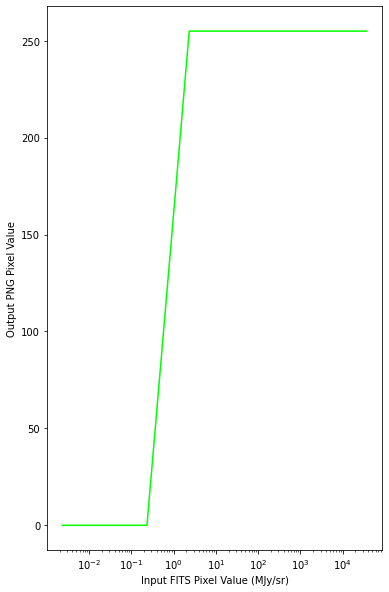

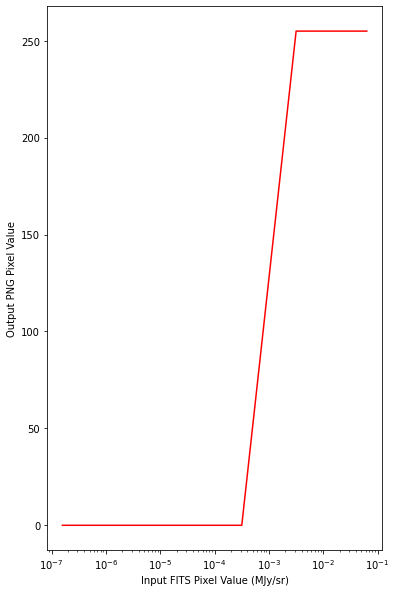

In [8]:
# For display purposes, plot each of the functions showing the conversion 
# between the scientific units and the output image units.
x=numpy.arange(-0.2,3.5,0.1)
y=x*2.0*255
y[y<0]=0
y[y>255]=255
pp.figure(figsize=[6,10])
pp.plot(10**(x-0.90),y,color='#0000FF')
pp.xlabel('Input FITS Pixel Value (MJy/sr)')
pp.ylabel('Output PNG Pixel Value')
pp.xscale('log')

x=numpy.arange(-2.5,4.8,0.1)
y=(x+0.5)*1.0*255
y[y<0]=0
y[y>255]=255
pp.figure(figsize=[6,10])
pp.plot(10**(x-0.13),y,color='#00FF00')
pp.xlabel('Input FITS Pixel Value (MJy/sr)')
pp.ylabel('Output PNG Pixel Value')
pp.xscale('log')

x=numpy.arange(-3.8,1.9,0.1)
y=(x+0.5)*1.0*255
y[y<0]=0
y[y>255]=255
pp.figure(figsize=[6,10])
pp.plot(10**(x-3.0),y,color='#FF0000')
pp.xlabel('Input FITS Pixel Value (MJy/sr)')
pp.ylabel('Output PNG Pixel Value')
pp.xscale('log')

Export the images.

In [9]:
# Create an RGB cube.
imgrgb=numpy.zeros((2160,1440,3))
imgrgb[:,:,0]=numpy.flip(imgrscl,0)
imgrgb[:,:,1]=numpy.flip(imggscl,0)
imgrgb[:,:,2]=numpy.flip(imgbscl,0)

In [10]:
# Write the image to disk.
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_repcolour.png','PNG')

In [11]:
# Export the blue channel image (in colour and greyscale).
imgrgb=numpy.zeros((2160,1440,3))
imgrgb[:,:,2]=numpy.flip(imgbscl,0)
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_repcolour_b.png','PNG')
imgsav=Image.fromarray(numpy.flip(imgbscl.astype('uint8'),0),mode='L')
imgsav.save('ngc3031_repcolour_b_bw.png','PNG')

In [12]:
# Export the green channel image (in colour and greyscale).
imgrgb=numpy.zeros((2160,1440,3))
imgrgb[:,:,1]=numpy.flip(imggscl,0)
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_repcolour_g.png','PNG')
imgsav=Image.fromarray(numpy.flip(imggscl.astype('uint8'),0),mode='L')
imgsav.save('ngc3031_repcolour_g_bw.png','PNG')

In [13]:
# Export the red channel image (in colour and greyscale).
imgrgb=numpy.zeros((2160,1440,3))
imgrgb[:,:,0]=numpy.flip(imgrscl,0)
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_repcolour_r.png','PNG')
imgsav=Image.fromarray(numpy.flip(imgrscl.astype('uint8'),0),mode='L')
imgsav.save('ngc3031_repcolour_r_bw.png','PNG')